# Data Loading

In [1]:
# Directly Fetching the data from Kaggle

!kaggle datasets download -d swish9/synthetic-indian-automobile-crash-data
!unzip synthetic-indian-automobile-crash-data.zip -d crash_data

Dataset URL: https://www.kaggle.com/datasets/swish9/synthetic-indian-automobile-crash-data
License(s): MIT
  0% 0.00/269k [00:00<?, ?B/s]
100% 269k/269k [00:00<00:00, 65.3MB/s]
Archive:  synthetic-indian-automobile-crash-data.zip
  inflating: crash_data/synthetic_automobile_crash_data_india.csv  


In [30]:
#Importing all th libraries used in the code and model predictions
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# File Loading

In [3]:
# Loading data
data = pd.read_csv('/content/crash_data/synthetic_automobile_crash_data_india.csv')
data = data.head(3500)

data.head()

,Vehicle_make,Vehicle_type,Vehicle_year,Engine_type,Engine_displacement,Transmission_type,Number_of_cylinders,Vehicle_weight,Vehicle_length,Vehicle_width,...,TCS_presence,TPMS_presence,Crash_location,Weather_conditions,Road_surface_conditions,Time_of_day,Day_of_week,Driver_age,Driver_gender,Crash_severity
0,Mahindra,sedan,2008,diesel,2001,automatic,6,1160,4072,1498,...,1.0,0.0,rural,clear,dry,morning,Monday,75,Male,severe
1,Honda,sedan,2014,CNG,2959,manual,4,1949,3947,1933,...,0.0,1.0,NaN,clear,NaN,night,Saturday,80,Female,severe
2,Tata Motors,SUV,2015,electric,1694,manual,4,1943,4785,1885,...,True,True,rural,clear,dry,afternoon,Monday,41,Female,severe
3,Honda,pickup,2020,CNG,1168,manual,6,1013,3800,1470,...,1.0,1.0,NaN,clear,dry,night,Monday,45,Female,severe
4,Honda,hatchback,2007,CNG,1735,manual,3,2134,4472,1827,...,1.0,1.0,urban,clear,dry,afternoon,NaN,50,Female,severe


In [4]:
# Summary statistics
data.describe()

,Vehicle_year,Engine_displacement,Number_of_cylinders,Vehicle_weight,Vehicle_length,Vehicle_width,Vehicle_height,Safety_rating,Number_of_airbags,Driver_age
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,2010.974571,1963.078000,4.506286,1652.338857,4246.452000,1699.180286,1595.794286,2.485714,3.992286,50.968857
std,6.599140,615.078027,1.243085,489.091072,431.232283,172.771649,114.876478,1.116568,2.008043,19.481633
min,2000.000000,800.000000,3.000000,800.000000,3500.000000,1400.000000,1400.000000,1.000000,1.000000,18.000000
25%,2005.000000,1472.000000,3.000000,1226.000000,3871.000000,1549.000000,1498.750000,1.000000,2.000000,34.000000
50%,2011.000000,1990.000000,4.000000,1647.500000,4242.500000,1698.000000,1593.000000,2.000000,4.000000,51.000000
75%,2017.000000,2484.000000,6.000000,2086.000000,4619.000000,1850.000000,1693.000000,3.000000,6.000000,68.000000
max,2022.000000,2999.000000,6.000000,2499.000000,4999.000000,1999.000000,1799.000000,4.000000,7.000000,84.000000


# Data Preprocessing

In [5]:
# Check for null values
#Null values calculatiion Sum all the null values
null_values = data.isnull().sum()
print("Null values in each column:\n", null_values)

Null values in each column:
 Vehicle_make                 0
Vehicle_type                 0
Vehicle_year                 0
Engine_type                  0
Engine_displacement          0
Transmission_type            0
Number_of_cylinders          0
Vehicle_weight               0
Vehicle_length               0
Vehicle_width                0
Vehicle_height               0
Safety_rating                0
Number_of_airbags            0
ABS_presence               275
ESC_presence               264
TCS_presence               266
TPMS_presence              251
Crash_location             350
Weather_conditions         346
Road_surface_conditions    379
Time_of_day                  0
Day_of_week                458
Driver_age                   0
Driver_gender              103
Crash_severity               0
dtype: int64


# Handling Null Values in Categorical and Numerical Variables


In [6]:
# Strategy to handle null values
# For categorical variables, filling null values with the most frequent category (mode)
# For numerical variables, filling null values with the mean or median


# List of categorical columns with missing values
categorical_cols_with_missing = ['ABS_presence', 'ESC_presence', 'TCS_presence', 'TPMS_presence', 'Crash_location', 'Weather_conditions', 'Road_surface_conditions', 'Day_of_week', 'Driver_gender']

# Fill missing values with mode
for col in categorical_cols_with_missing:
    data[col].fillna(data[col].mode()[0], inplace=True)

# List of numeric columns with missing values
numeric_cols_with_missing = []

# Fill missing values with mean or median
#Using for loop to calculate and fill each and every null value with median or mean
for col in numeric_cols_with_missing:
    data[col].fillna(data[col].median(), inplace=True)  # Use median as a measure of central tendency

In [7]:
# Check for missing values after filling
data.isnull().sum()

Vehicle_make               0
Vehicle_type               0
Vehicle_year               0
Engine_type                0
Engine_displacement        0
Transmission_type          0
Number_of_cylinders        0
Vehicle_weight             0
Vehicle_length             0
Vehicle_width              0
Vehicle_height             0
Safety_rating              0
Number_of_airbags          0
ABS_presence               0
ESC_presence               0
TCS_presence               0
TPMS_presence              0
Crash_location             0
Weather_conditions         0
Road_surface_conditions    0
Time_of_day                0
Day_of_week                0
Driver_age                 0
Driver_gender              0
Crash_severity             0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Vehicle_make             3500 non-null   object
 1   Vehicle_type             3500 non-null   object
 2   Vehicle_year             3500 non-null   int64 
 3   Engine_type              3500 non-null   object
 4   Engine_displacement      3500 non-null   int64 
 5   Transmission_type        3500 non-null   object
 6   Number_of_cylinders      3500 non-null   int64 
 7   Vehicle_weight           3500 non-null   int64 
 8   Vehicle_length           3500 non-null   int64 
 9   Vehicle_width            3500 non-null   int64 
 10  Vehicle_height           3500 non-null   int64 
 11  Safety_rating            3500 non-null   int64 
 12  Number_of_airbags        3500 non-null   int64 
 13  ABS_presence             3500 non-null   object
 14  ESC_presence             3500 non-null  

In [9]:
# Data Identification from the above Data

# We identify data from the above so we make two var to save and distinguish the numeric and categorical features o it will be easy for understanding the code
numeric_features = ['Vehicle_year', 'Engine_displacement', 'Vehicle_weight', 'Vehicle_length', 'Vehicle_width', 'Vehicle_height', 'Safety_rating', 'Number_of_airbags', 'Driver_age']

# Categorical features
categorical_features = ['Vehicle_make', 'Vehicle_type', 'Engine_type', 'Transmission_type', 'Number_of_cylinders', 'ABS_presence', 'ESC_presence', 'TCS_presence', 'TPMS_presence', 'Crash_location', 'Weather_conditions', 'Road_surface_conditions', 'Time_of_day', 'Day_of_week', 'Driver_gender', 'Crash_severity']

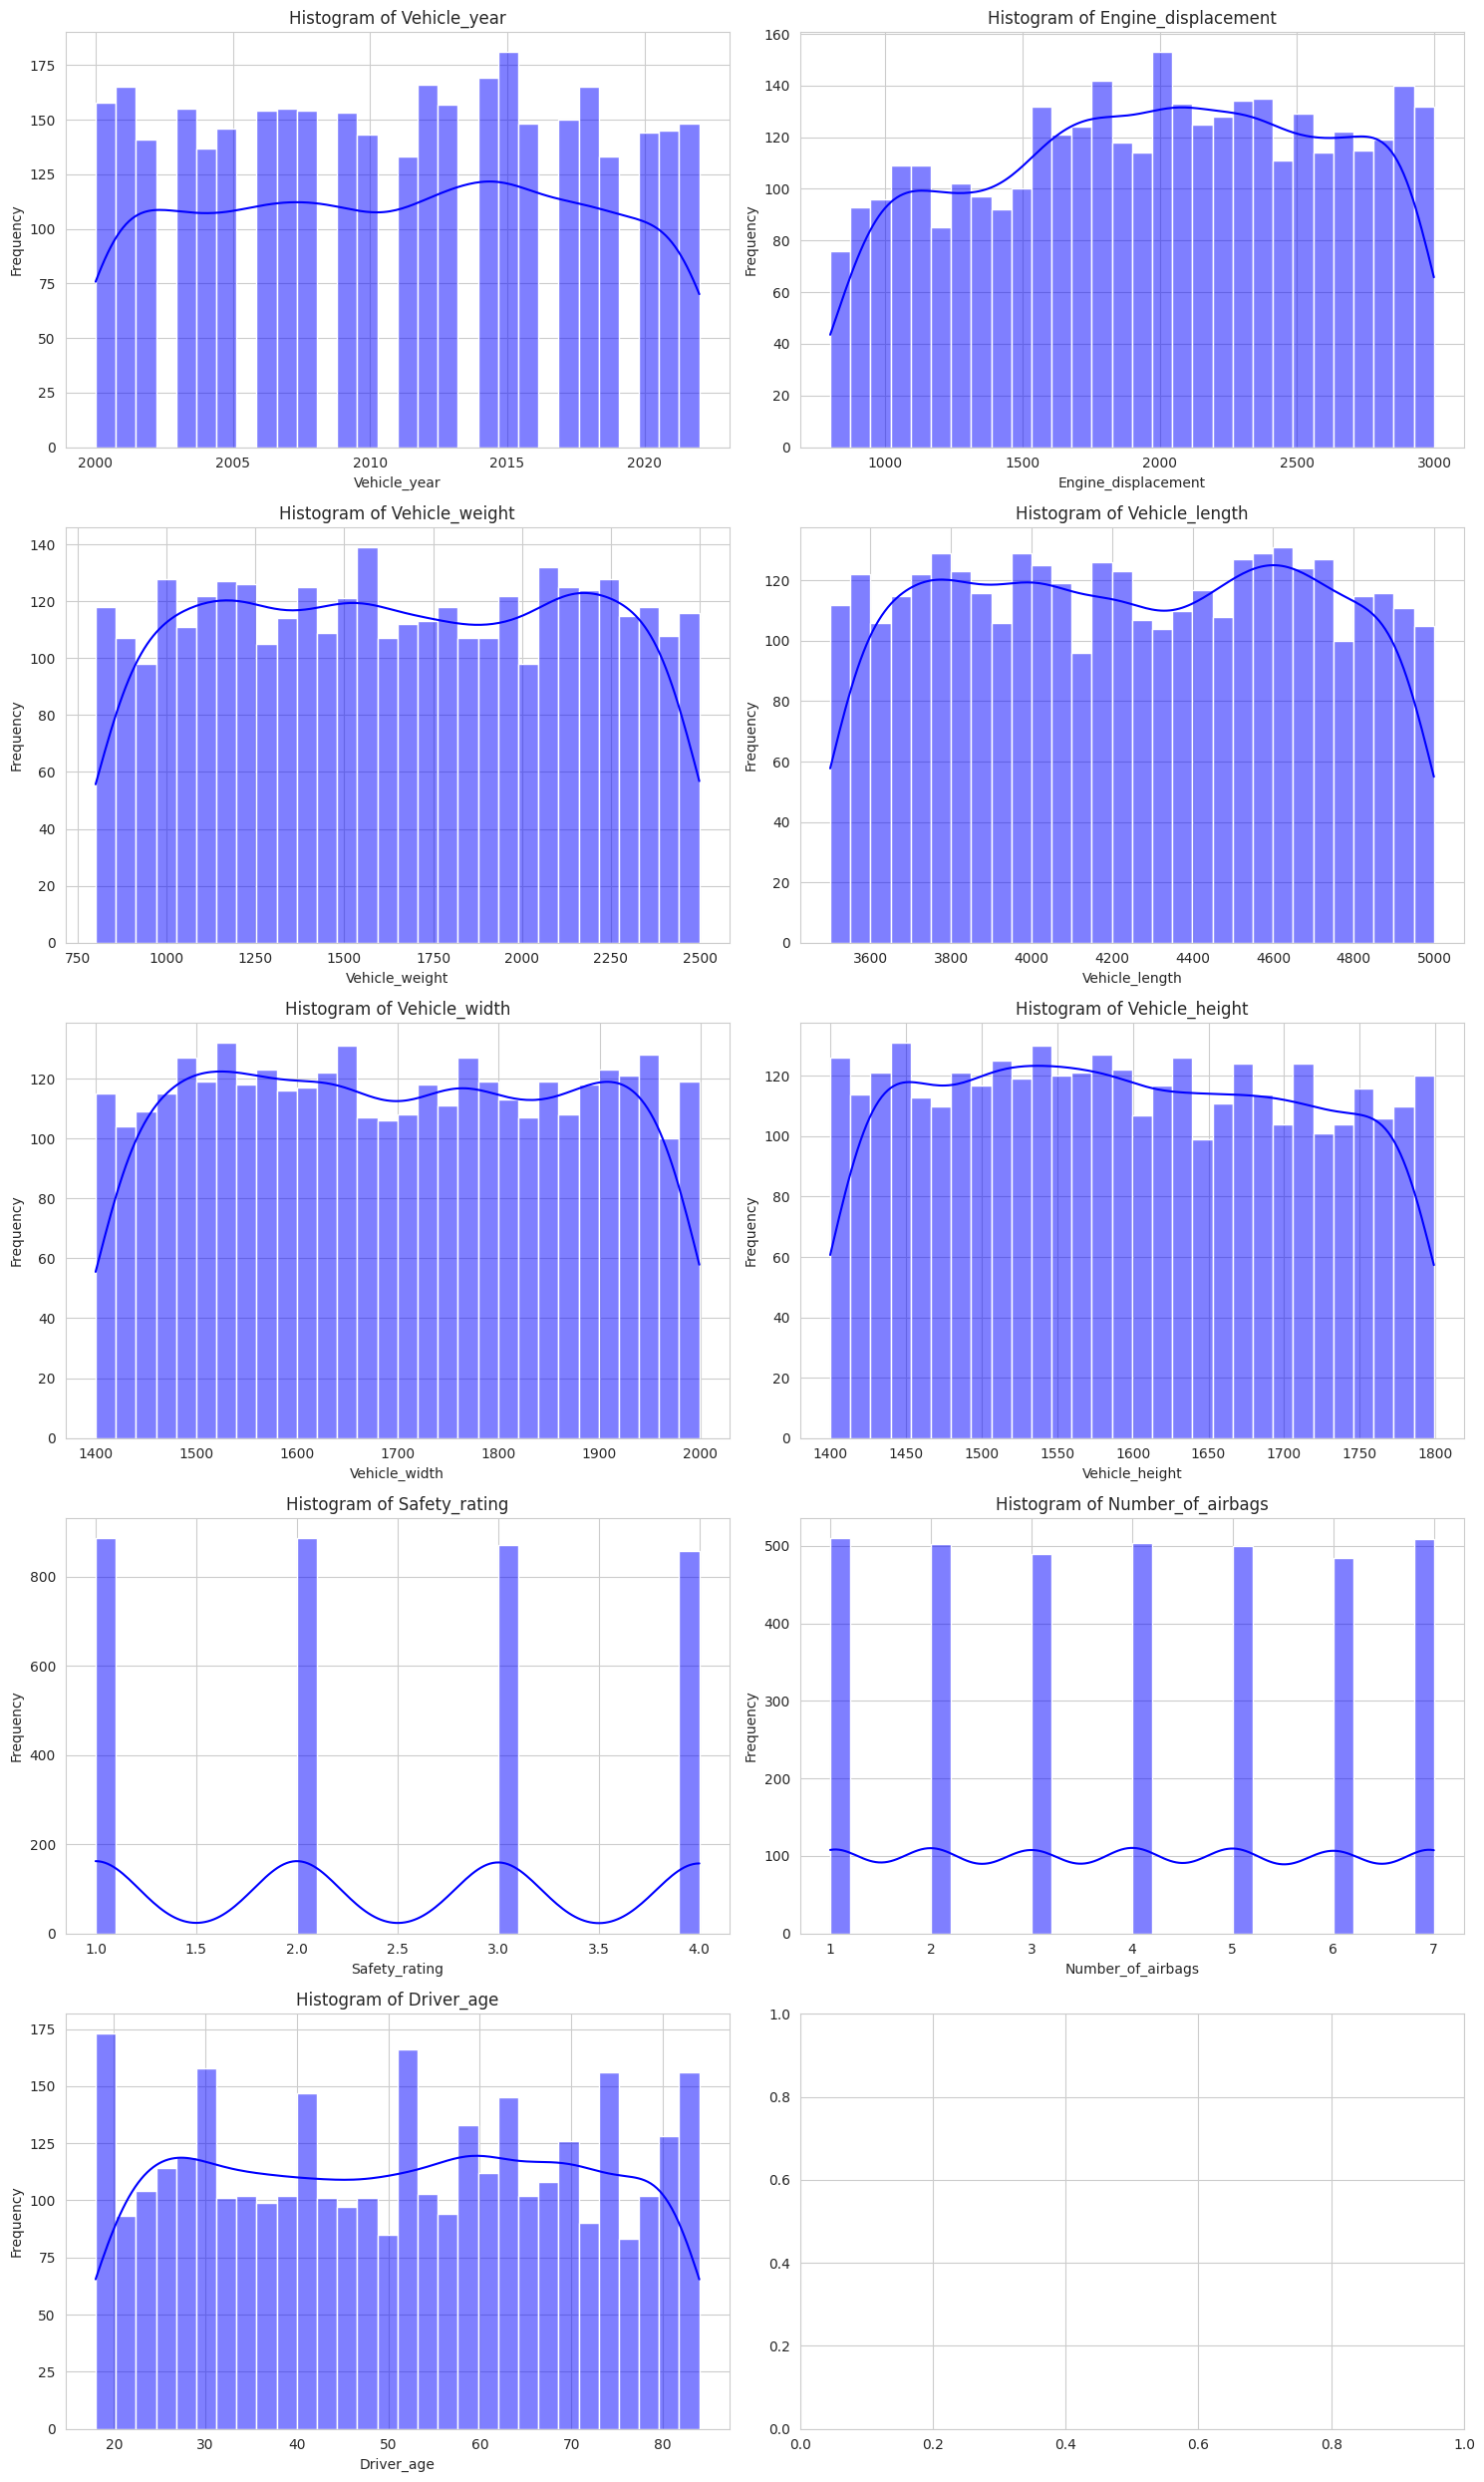

In [10]:
# Style of seaborn
sns.set_style("whitegrid")

# Histograms for numeric features
num_plots = len(numeric_features)
num_cols = 2 # Number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
# The code iterates over each numeric feature in the numeric_features list using a for loop.
for i, feature in enumerate(numeric_features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.histplot(data[feature], kde=True, color='blue', bins=30, ax=ax)
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

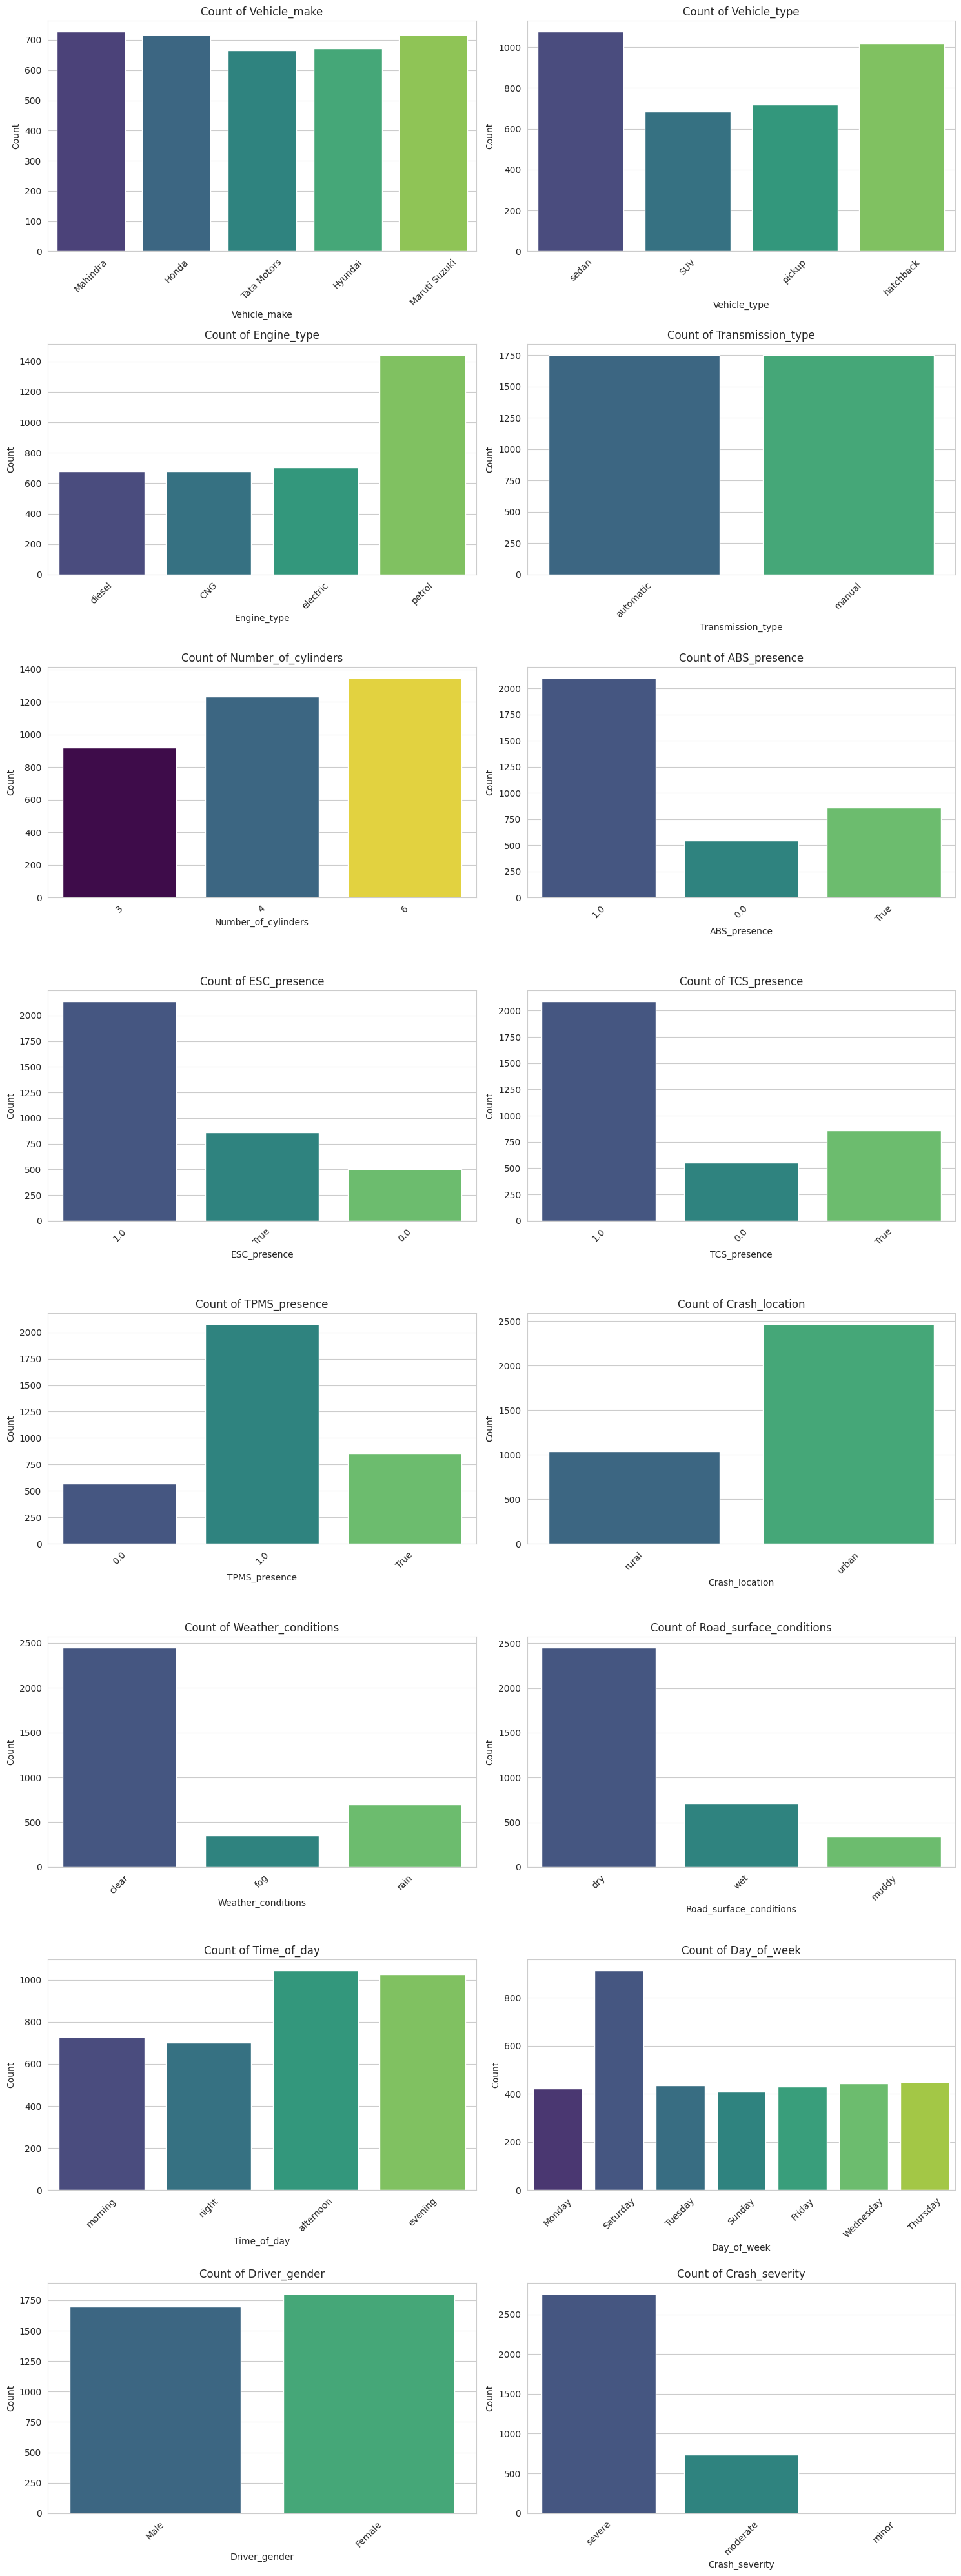

In [11]:
# Bar plots for categorical features
num_plots = len(categorical_features)
num_cols = 2  # Number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
# The code iterates over each categorical feature in the categorical_features list using a for loop.
for i, feature in enumerate(categorical_features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.countplot(data=data, x=feature, hue=feature, palette='viridis', ax=ax, legend=False)
    ax.set_title(f'Count of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



# Correlation Matrix

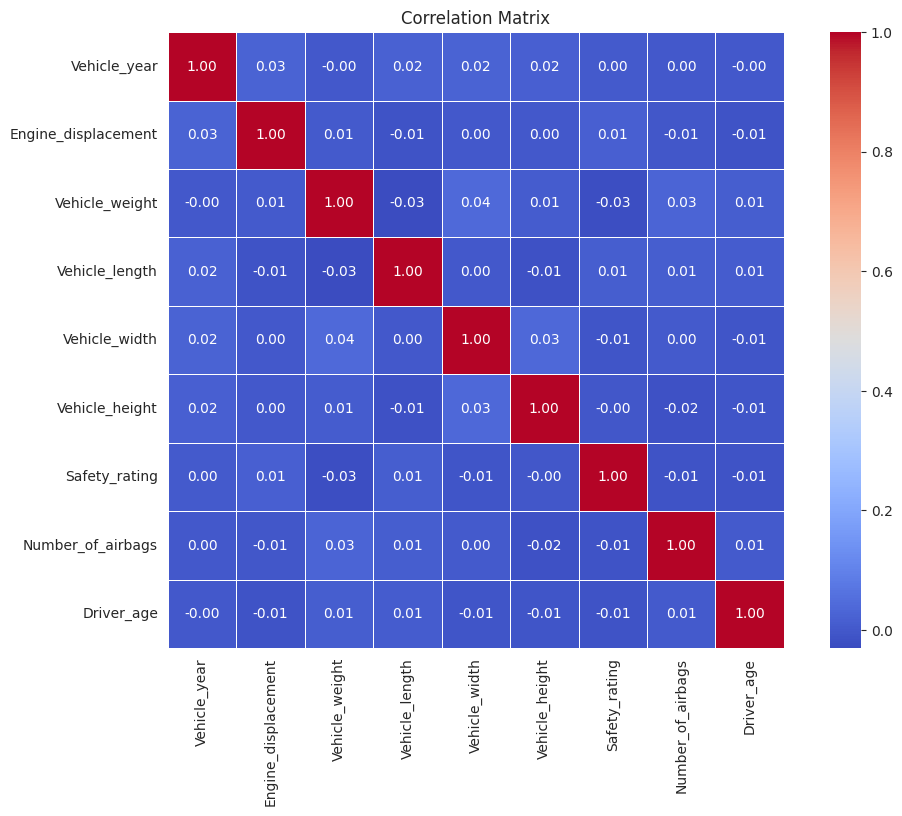

In [12]:
# Correlation matrix
correlation_matrix = data[numeric_features].corr()

# Heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
#Title for heat map
plt.title('Correlation Matrix')
#Display heatmap
plt.show()

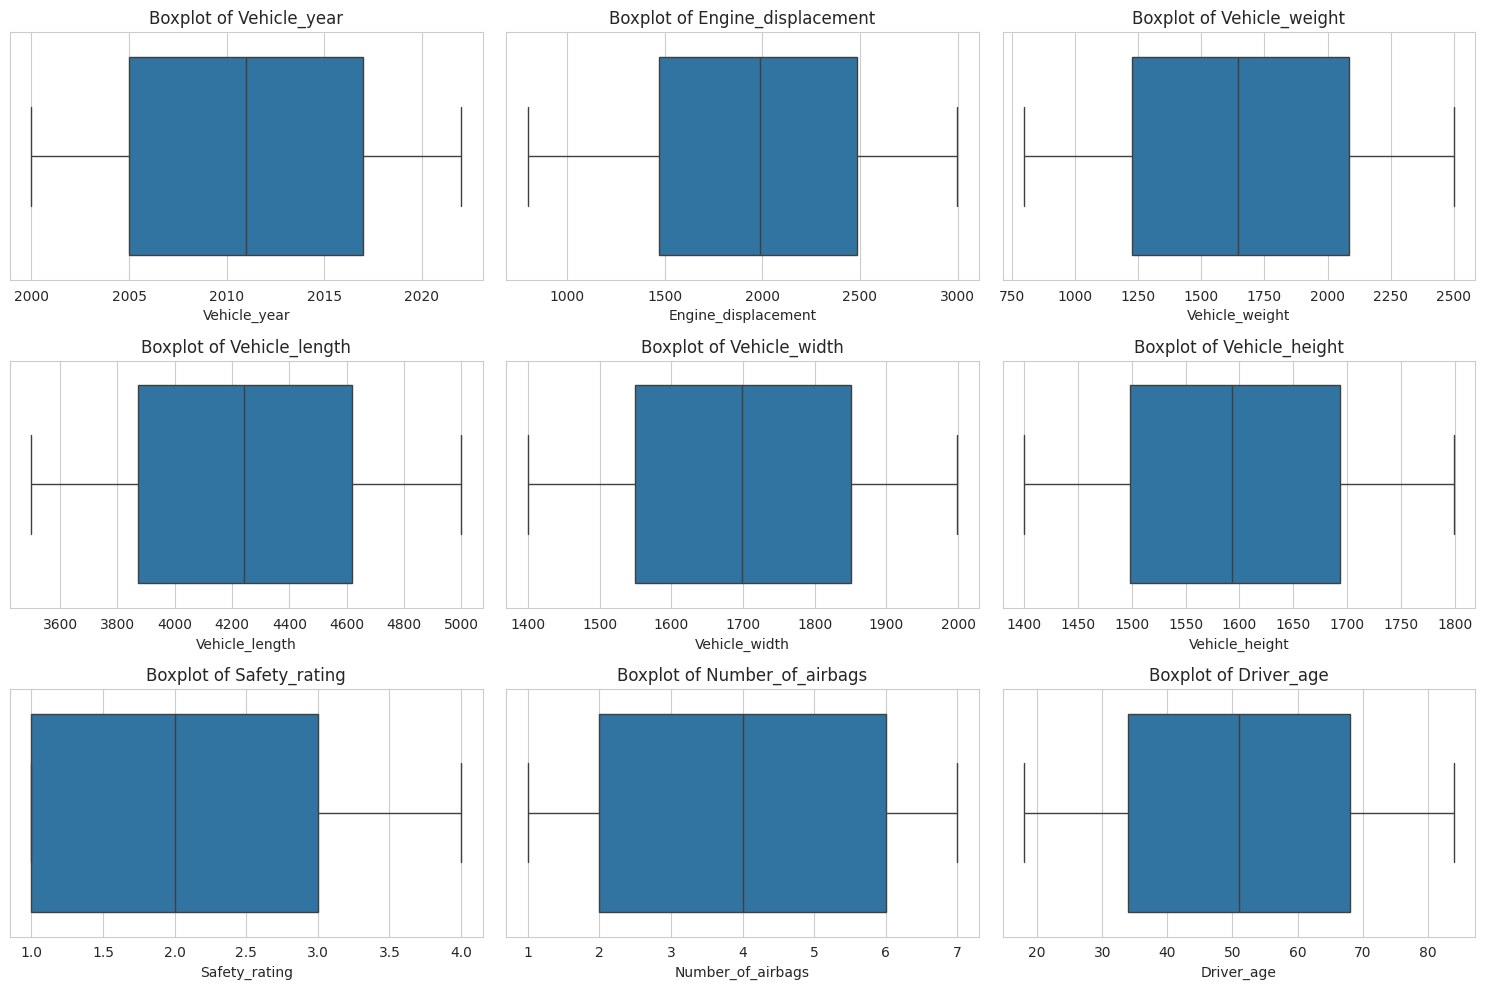

In [13]:
# Plot box plots for numeric features / Outlier Detection
plt.figure(figsize=(15, 10))
# Iterate over numeric features
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=data[feature] )
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

# plt command to plot and show
plt.tight_layout()
plt.show()


# Calculating Z scores and outliers

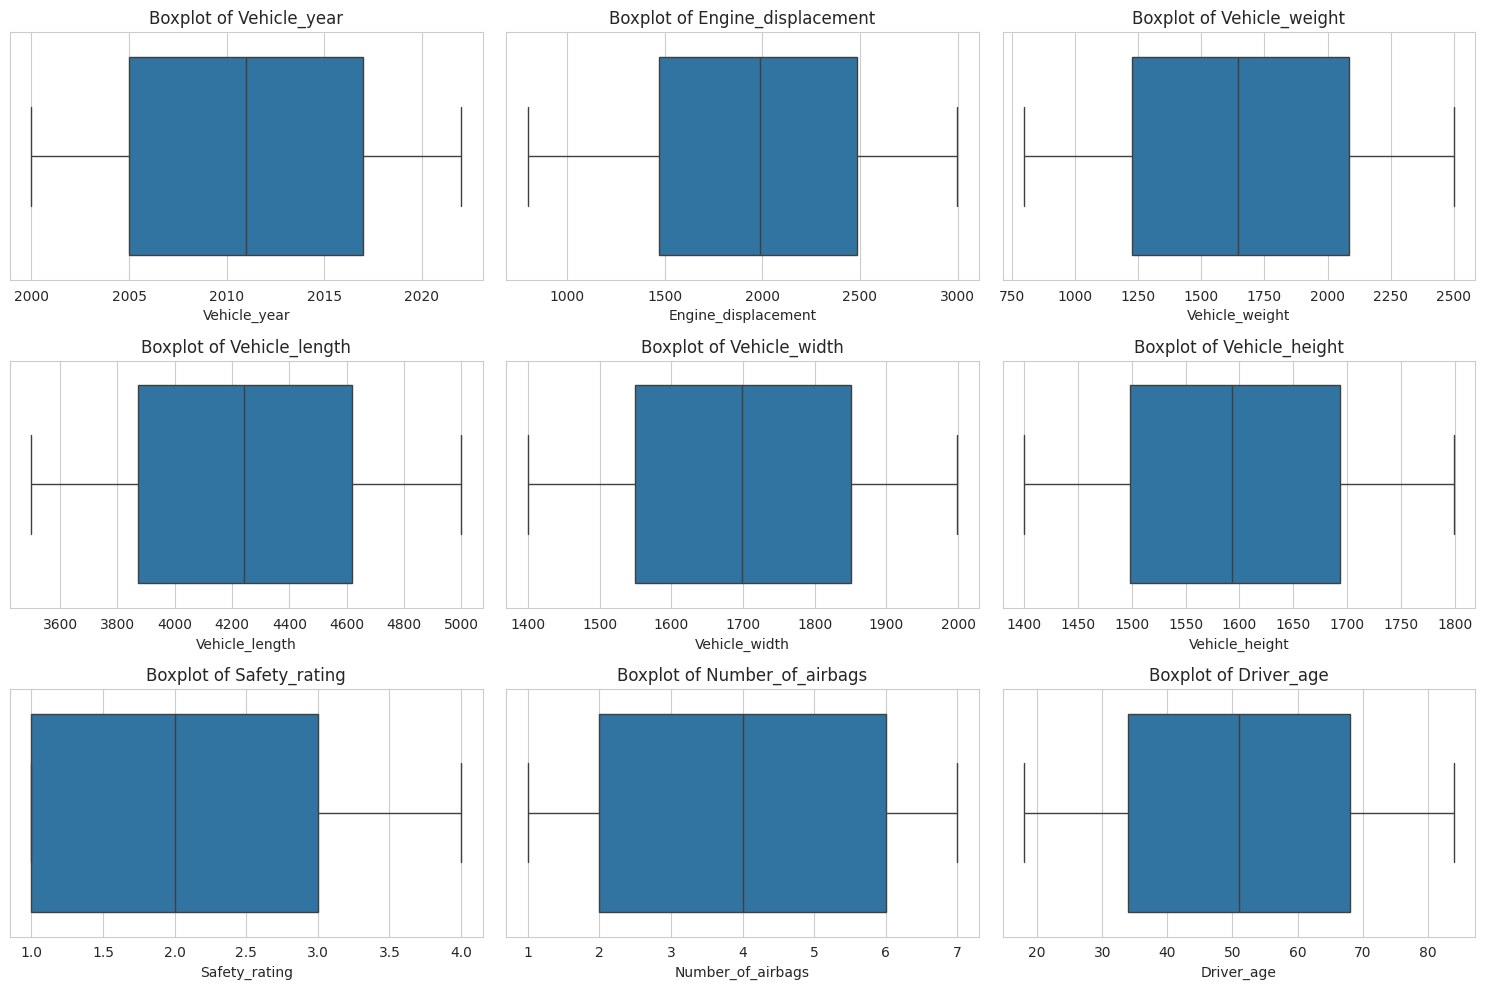

In [14]:
from scipy import stats

# Z-scores for each numeric feature
z_scores = stats.zscore(data[numeric_features])

# Threshold for z-score
threshold = 3

# Find indices of outliers
outlier_indices = (z_scores > threshold).any(axis=1)

# Remove outliers from the DataFrame
data_no_outliers = data[~outlier_indices]

# Plot box plots for numeric features after removing outliers
plt.figure(figsize=(15, 10))
## Create subplots for box plots of numeric features
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i+1)
# Generate a box plot for the current feature
    sns.boxplot(x=data_no_outliers[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


In [15]:
# Calculate Vehicle Age
data['Vehicle_age'] = 2024 - data['Vehicle_year']

# Assuming driver experience to be the difference between Driver Age and a starting age, say 18
data['Driver_experience'] = data['Driver_age'] - 18

# DataFrame to select only 'Driver_experience' and 'Vehicle_age' columns
selected_columns = ['Vehicle_make' , 'Driver_gender', 'Driver_age','Driver_experience', 'Vehicle_age']
selected_data = data[selected_columns]

selected_data.head(10)


,Vehicle_make,Driver_gender,Driver_age,Driver_experience,Vehicle_age
0,Mahindra,Male,75,57,16
1,Honda,Female,80,62,10
2,Tata Motors,Female,41,23,9
3,Honda,Female,45,27,4
4,Honda,Female,50,32,17
5,Hyundai,Male,60,42,9
6,Tata Motors,Male,22,4,20
7,Tata Motors,Male,70,52,7
8,Tata Motors,Male,55,37,5
9,Honda,Male,76,58,11


#MODELS

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


# Encode categorical variables
categorical_columns = ['Vehicle_make', 'Vehicle_type', 'Engine_type', 'Transmission_type', 'Crash_location', 'Weather_conditions', 'Road_surface_conditions', 'Time_of_day', 'Day_of_week', 'Driver_gender']
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_data = pd.DataFrame(encoder.fit_transform(data[categorical_columns]))
encoded_data.columns = encoder.get_feature_names_out(categorical_columns)

# Concatenate encoded categorical features with numerical features
numerical_columns = ['Vehicle_year', 'Engine_displacement', 'Number_of_cylinders', 'Vehicle_weight', 'Vehicle_length', 'Vehicle_width', 'Vehicle_height', 'Safety_rating', 'Number_of_airbags', 'ABS_presence', 'ESC_presence', 'TCS_presence', 'TPMS_presence', 'Driver_age', 'Crash_severity']
X = pd.concat([data[numerical_columns], encoded_data], axis=1)

# Target variable
y = data['Crash_severity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the first few rows of preprocessed features (X) and target variable (y)
print("Features (X):")
print(X.head())
print("\nTarget variable (y):")
print(y.head())


Features (X):
   Vehicle_year  Engine_displacement  Number_of_cylinders  Vehicle_weight  \
0          2008                 2001                    6            1160   
1          2014                 2959                    4            1949   
2          2015                 1694                    4            1943   
3          2020                 1168                    6            1013   
4          2007                 1735                    3            2134   

   Vehicle_length  Vehicle_width  Vehicle_height  Safety_rating  \
0            4072           1498            1500              2   
1            3947           1933            1719              1   
2            4785           1885            1628              4   
3            3800           1470            1602              1   
4            4472           1827            1484              3   

   Number_of_airbags ABS_presence  ... Time_of_day_night Day_of_week_Friday  \
0                  2          1.0  ...   

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
# Display the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2800, 51)
X_test shape: (700, 51)
y_train shape: (2800,)
y_test shape: (700,)


In [18]:
# Convert categorical variables to dummy/indicator variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Display the first few rows of the encoded dataframe
data_encoded.head()

,Vehicle_year,Engine_displacement,Number_of_cylinders,Vehicle_weight,Vehicle_length,Vehicle_width,Vehicle_height,Safety_rating,Number_of_airbags,Driver_age,...,Time_of_day_night,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Driver_gender_Male,Crash_severity_moderate,Crash_severity_severe
0,2008,2001,6,1160,4072,1498,1500,2,2,75,...,False,True,False,False,False,False,False,True,False,True
1,2014,2959,4,1949,3947,1933,1719,1,5,80,...,True,False,True,False,False,False,False,False,False,True
2,2015,1694,4,1943,4785,1885,1628,4,1,41,...,False,True,False,False,False,False,False,False,False,True
3,2020,1168,6,1013,3800,1470,1602,1,4,45,...,True,True,False,False,False,False,False,False,False,True
4,2007,1735,3,2134,4472,1827,1484,3,6,50,...,False,False,True,False,False,False,False,False,False,True


In [19]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data_encoded.drop('Crash_severity_severe', axis=1)  # Drop one of the dummy variables to avoid multicollinearity
y = data_encoded['Crash_severity_severe']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2800, 47)
X_test shape: (700, 47)
y_train shape: (2800,)
y_test shape: (700,)


Linear Regression MSE and R-square calculation

In [ ]:
# Initialize Linear Regression model
linear_reg = LinearRegression()

# Fit the model on the training data
linear_reg.fit(X_train, y_train)

# Predict on the testing data
y_pred_linear = linear_reg.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Mean Squared Error (Linear Regression): {mse_linear}")
print(f"R-squared Score (Linear Regression): {r2_linear}")

Mean Squared Error (Linear Regression): 0.0014313037169374962
R-squared Score (Linear Regression): 0.9918102337650126


In [ ]:
sorted_idx = np.argsort(y_test)

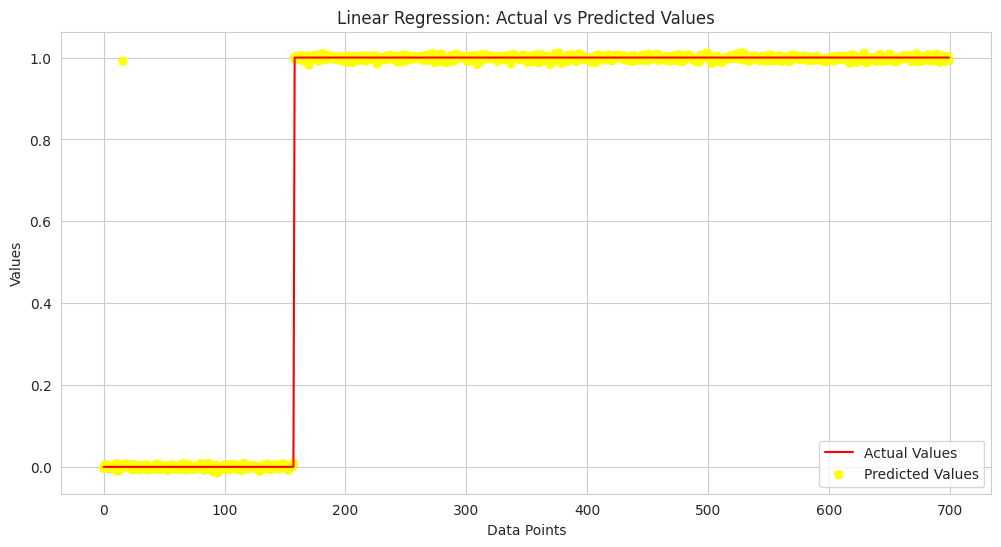

In [ ]:
sorted_idx = y_test.argsort()  # Sorting indices of y_test
y_test_sorted = y_test.iloc[sorted_idx].values  # Sorting y_test values
y_pred_linear_sorted = y_pred_linear[sorted_idx]  # Sorting y_pred_linear values

# Plotting actual vs sorted predicted values
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_sorted)), y_test_sorted, label='Actual Values', color='red')
plt.scatter(range(len(y_pred_linear_sorted)), y_pred_linear_sorted, label='Predicted Values', color='yellow', linestyle='--')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Linear Regression: Actual vs Predicted Values')
plt.legend()
plt.show()


# Logistic Regrssion Model + visualization


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=200)

# Train the model
logistic_regression_model.fit(X_train, y_train)

# Make predictions
y_pred_logis = logistic_regression_model.predict(X_test)
#Calculating accuracy and classification report
accuracy = accuracy_score(y_test, y_pred_logis)
classification_report = classification_report(y_test, y_pred_logis)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report)


Accuracy: 0.9828571428571429
Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.94      0.96       158
        True       0.98      0.99      0.99       542

    accuracy                           0.98       700
   macro avg       0.98      0.97      0.98       700
weighted avg       0.98      0.98      0.98       700



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


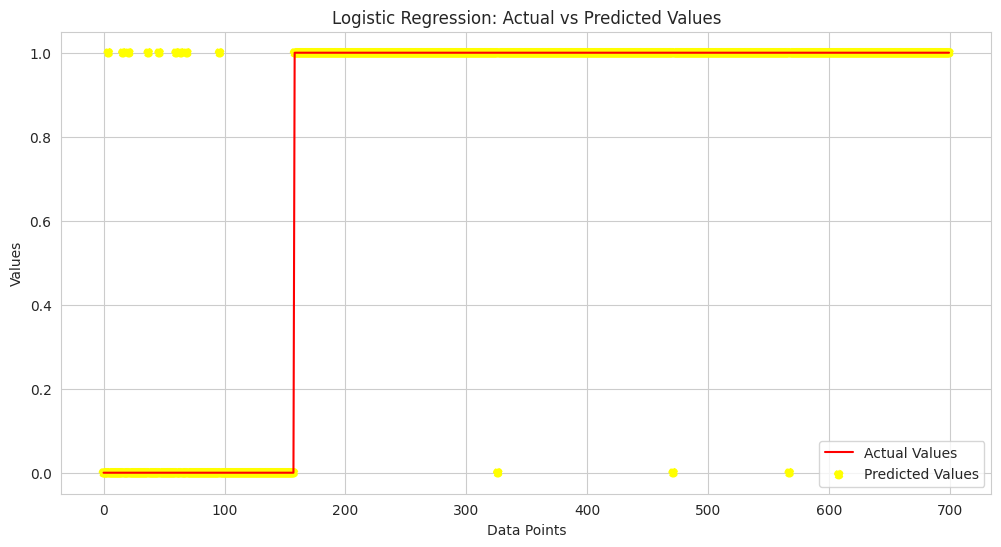

In [ ]:
sorted_idx = y_test.argsort()  # Sorting indices of y_test
y_test_sorted = y_test.iloc[sorted_idx].values  # Sorting y_test values
y_pred_logis_sorted = y_pred_logis[sorted_idx]  # Sorting y_pred_linear values

# Plotting actual vs sorted predicted values
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_sorted)), y_test_sorted, label='Actual Values', color='red')
plt.scatter(range(len(y_pred_logis_sorted)), y_pred_logis_sorted, label='Predicted Values', color='yellow', linestyle='--')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Logistic Regression: Actual vs Predicted Values')
plt.legend()
plt.show()

SVM



# Support Vector Machine + Visualiztion

In [ ]:
import sklearn
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy Score (SVM): {accuracy_svm}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))


Accuracy Score (SVM): 0.9971428571428571
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.99      0.99       158
        True       1.00      1.00      1.00       542

    accuracy                           1.00       700
   macro avg       1.00      0.99      1.00       700
weighted avg       1.00      1.00      1.00       700



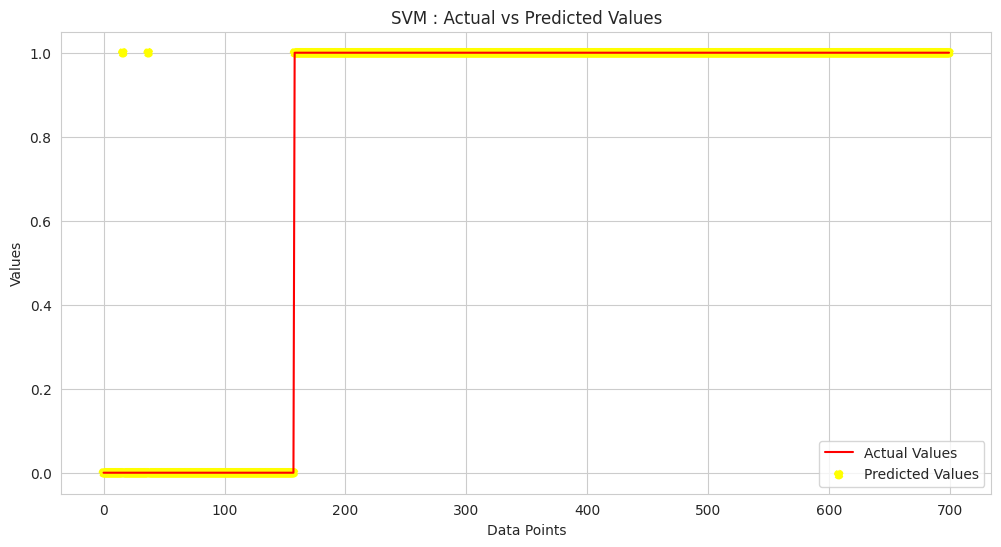

In [ ]:
sorted_idx = y_test.argsort()  # Sorting indices of y_test
y_test_sorted = y_test.iloc[sorted_idx].values  # Sorting y_test values
y_pred_svm_sorted = y_pred_svm[sorted_idx]  # Sorting y_pred_linear values

# Plotting actual vs sorted predicted values
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_sorted)), y_test_sorted, label='Actual Values', color='red')
plt.scatter(range(len(y_pred_svm_sorted)), y_pred_svm_sorted, label='Predicted Values', color='yellow', linestyle='--')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('SVM : Actual vs Predicted Values')
plt.legend()
plt.show()

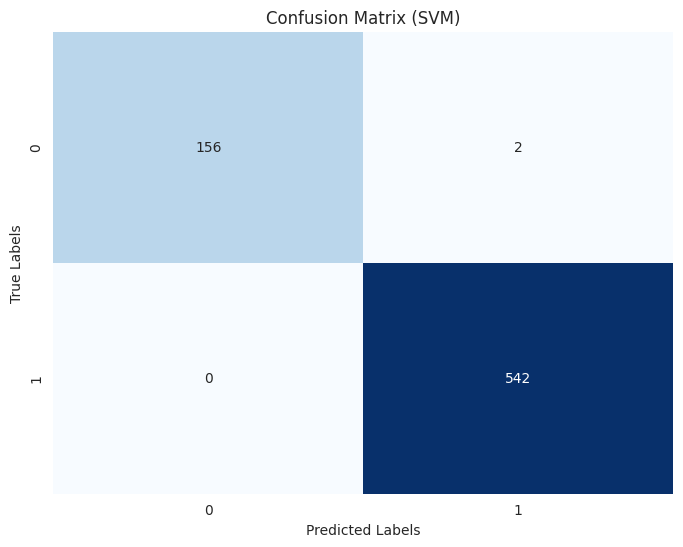

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (SVM)')
plt.show()


# Random Forest + visualiztion

In [ ]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = rf_model.predict(X_test)

# Calculating the accuracy and calassifcation report micr macro avg etc
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy Score (Random Forest): {accuracy_rf}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Accuracy Score (Random Forest): 0.9971428571428571
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.99      0.99       158
        True       1.00      1.00      1.00       542

    accuracy                           1.00       700
   macro avg       1.00      0.99      1.00       700
weighted avg       1.00      1.00      1.00       700



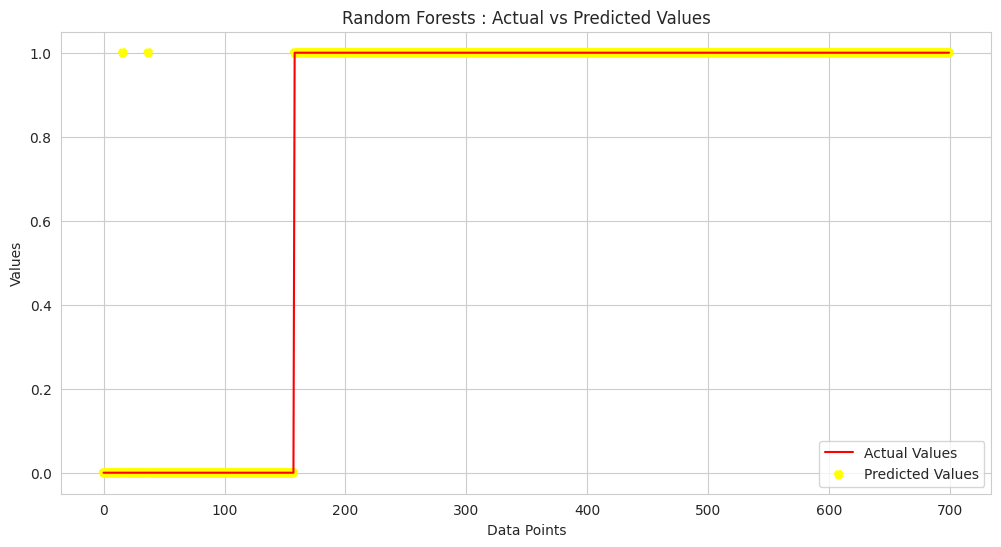

In [ ]:
sorted_idx = y_test.argsort()  # Sorting indices of y_test
y_test_sorted = y_test.iloc[sorted_idx].values  # Sorting y_test values
y_pred_rf_sorted = y_pred_rf[sorted_idx]  # Sorting y_pred_linear values

# Plotting actual vs sorted predicted values
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_sorted)), y_test_sorted, label='Actual Values', color='red')
plt.scatter(range(len(y_pred_rf_sorted)), y_pred_rf_sorted, label='Predicted Values', color='yellow', linestyle='--')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Random Forests : Actual vs Predicted Values')
plt.legend()
plt.show()




# Naive Bayes + Visualiztion

In [ ]:
# Initialize Naive Bayes model
nb_model = GaussianNB()

# Fit the model on the training data
nb_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy Score (Naive Bayes): {accuracy_nb}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

Accuracy Score (Naive Bayes): 0.9985714285714286
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.99      1.00       158
        True       1.00      1.00      1.00       542

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



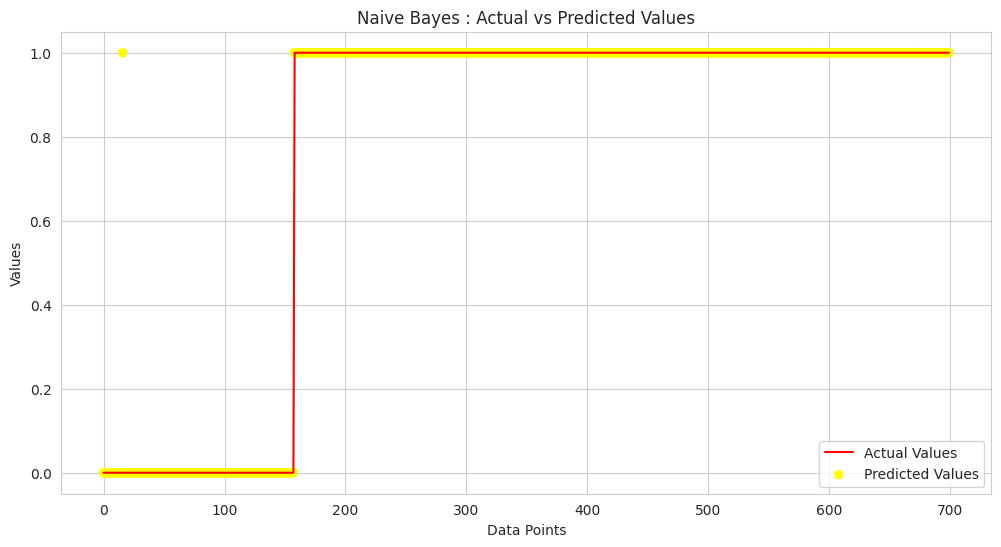

In [ ]:
# Line plot of actual vs sorted predicted values
sorted_idx = y_test.argsort()  # Sorting indices of y_test
y_test_sorted = y_test.iloc[sorted_idx].values  # Sorting y_test values
y_pred_nb_sorted = y_pred_nb[sorted_idx]  # Sorting y_pred_linear values

# Plotting actual vs sorted predicted values
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_sorted)), y_test_sorted, label='Actual Values', color='red')
plt.scatter(range(len(y_pred_nb_sorted)), y_pred_nb_sorted, label='Predicted Values', color='yellow', linestyle='--')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Naive Bayes : Actual vs Predicted Values')
plt.legend()
plt.show()

KNN




# KNN + Visualization

In [ ]:
# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy Score (KNN): {accuracy_knn}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

Accuracy Score (KNN): 0.7285714285714285
Classification Report:
              precision    recall  f1-score   support

       False       0.15      0.04      0.07       158
        True       0.77      0.93      0.84       542

    accuracy                           0.73       700
   macro avg       0.46      0.49      0.45       700
weighted avg       0.63      0.73      0.67       700



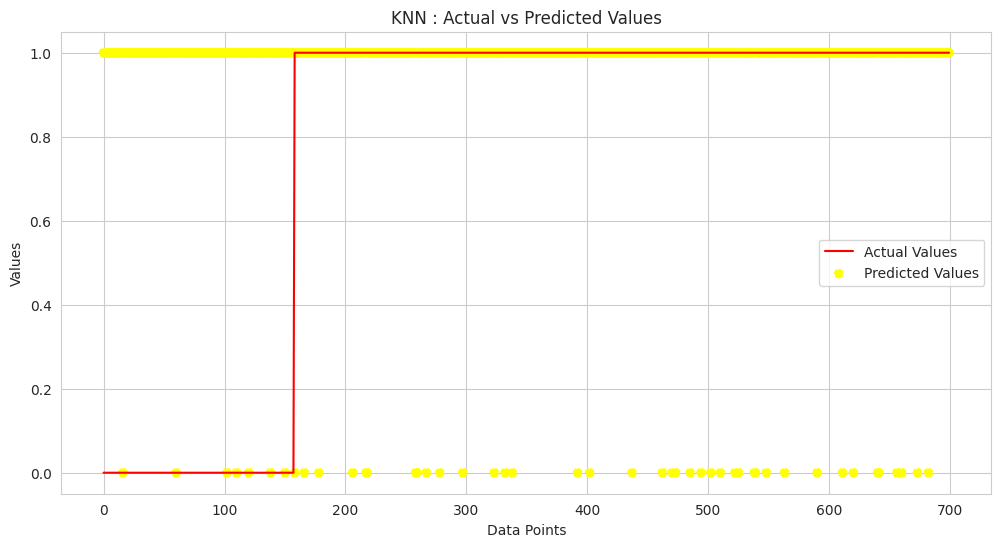

In [ ]:
# Line plot of actual vs sorted predicted values
sorted_idx = y_test.argsort()  # Sorting indices of y_test
y_test_sorted = y_test.iloc[sorted_idx].values  # Sorting y_test values
y_pred_knn_sorted = y_pred_knn[sorted_idx]  # Sorting y_pred_linear values

# Plotting actual vs sorted predicted values
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_sorted)), y_test_sorted, label='Actual Values', color='red')
plt.scatter(range(len(y_pred_knn_sorted)), y_pred_knn_sorted, label='Predicted Values', color='yellow', linestyle='--')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('KNN : Actual vs Predicted Values')
plt.legend()
plt.show()

Decision Tree

# Decision Tree + Visualization (DT)

In [ ]:
# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy Score (Decision Tree): {accuracy_dt}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Accuracy Score (Decision Tree): 0.9985714285714286
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.99      1.00       158
        True       1.00      1.00      1.00       542

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



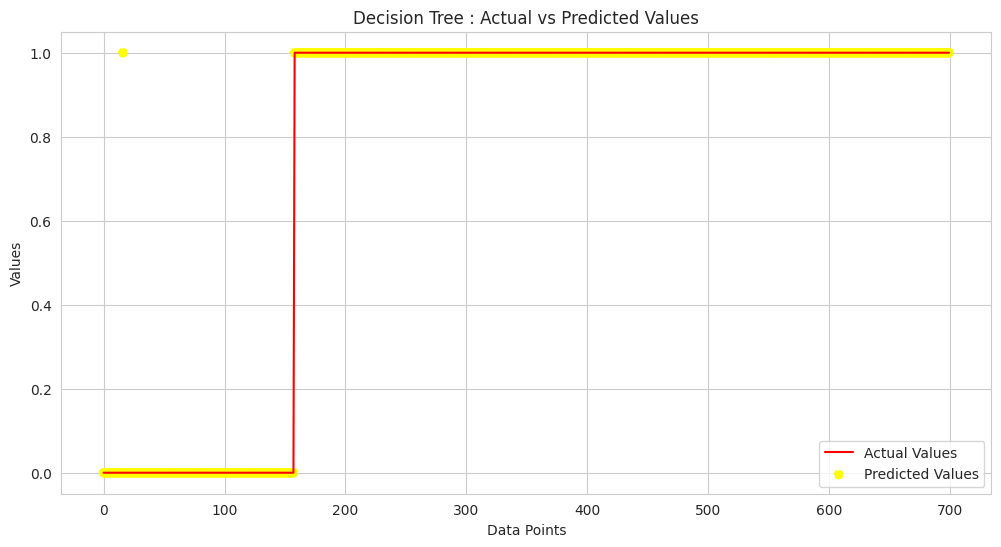

In [ ]:
# Line plot of actual vs sorted predicted values
sorted_idx = y_test.argsort()  # Sorting indices of y_test
y_test_sorted = y_test.iloc[sorted_idx].values  # Sorting y_test values
y_pred_dt_sorted = y_pred_dt[sorted_idx]  # Sorting y_pred_linear values

# Plotting actual vs sorted predicted values
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_sorted)), y_test_sorted, label='Actual Values', color='red')
plt.scatter(range(len(y_pred_dt_sorted)), y_pred_dt_sorted, label='Predicted Values', color='yellow', linestyle='--')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Decision Tree : Actual vs Predicted Values')
plt.legend()
plt.show()

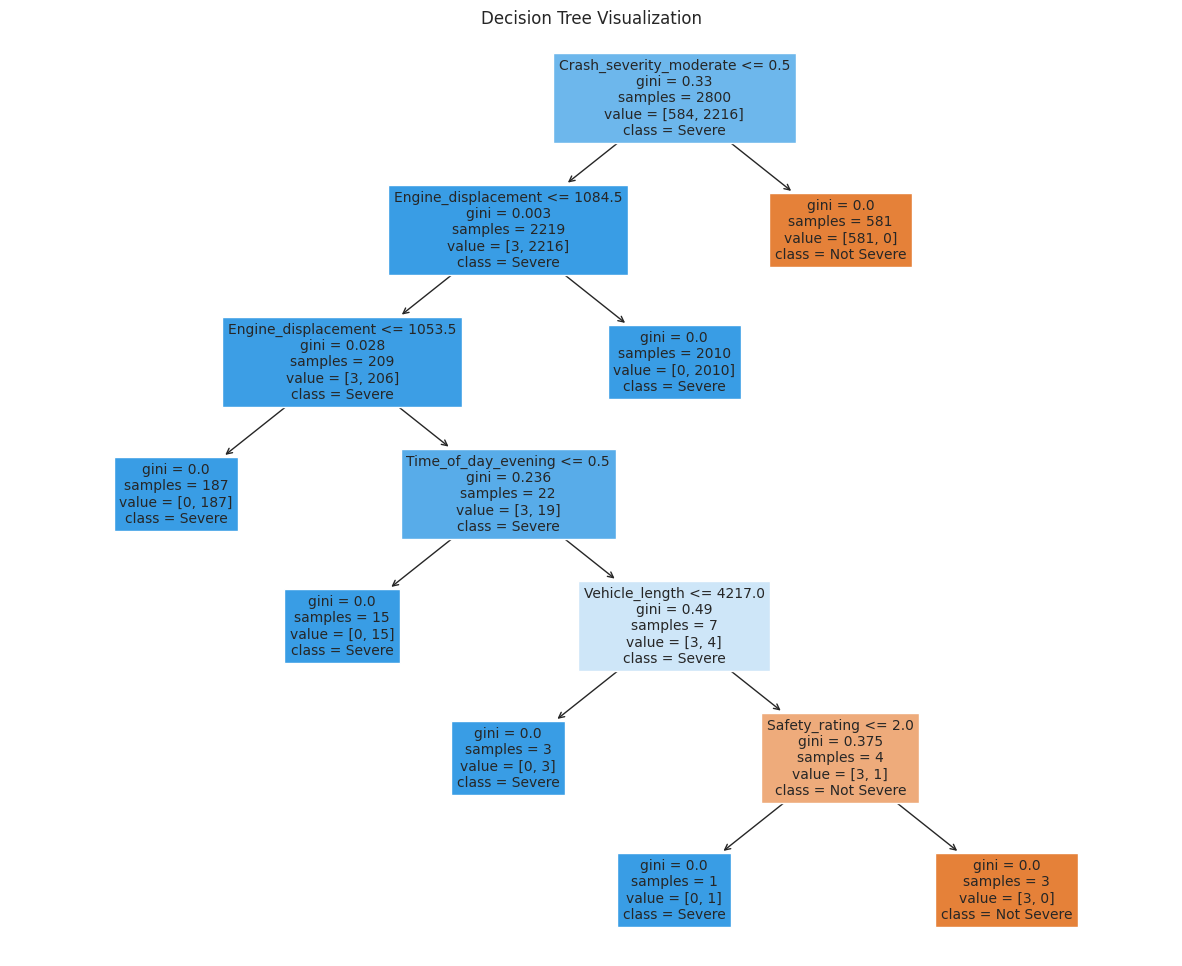

In [ ]:
# Plot the Decision Tree
plt.figure(figsize=(15, 12))
plot_tree(dt_model, feature_names=X.columns, class_names=['Not Severe', 'Severe'], filled=True, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

ANN

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ANN + Visualization

In [ ]:
# Initialize ANN model
ann_model = Sequential()

# Add input layer
ann_model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
ann_model.add(Dropout(0.2))  # Dropout layer to prevent overfitting

# Add hidden layer
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dropout(0.2))

# Add output layer
ann_model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

In [ ]:
# Compile the model
ann_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
# Train the model
history = ann_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
70/70 [==============================] - 1s 6ms/step - loss: 0.2352 - accuracy: 0.8987 - val_loss: 0.0827 - val_accuracy: 0.9821
Epoch 2/10
70/70 [==============================] - 0s 3ms/step - loss: 0.0445 - accuracy: 0.9920 - val_loss: 0.0468 - val_accuracy: 0.9839
Epoch 3/10
70/70 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.9955 - val_loss: 0.0288 - val_accuracy: 0.9893
Epoch 4/10
70/70 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 0.9978 - val_loss: 0.0198 - val_accuracy: 0.9946
Epoch 5/10
70/70 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 0.9978 - val_loss: 0.0152 - val_accuracy: 0.9964
Epoch 6/10
70/70 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 0.9991 - val_loss: 0.0151 - val_accuracy: 0.9964
Epoch 7/10
70/70 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 0.9996 - val_loss: 0.0149 - val_accuracy: 0.9964
Epoch 8/10
70/70 [==

In [ ]:
# Predict on the testing data
y_pred_ann = (ann_model.predict(X_test_scaled) > 0.5).astype("int32").flatten()

22/22 [==============================] - 0s 2ms/step


In [ ]:
# Evaluate the model
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print(f"Accuracy Score (ANN): {accuracy_ann}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_ann))

Accuracy Score (ANN): 0.9985714285714286
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.99      1.00       158
        True       1.00      1.00      1.00       542

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



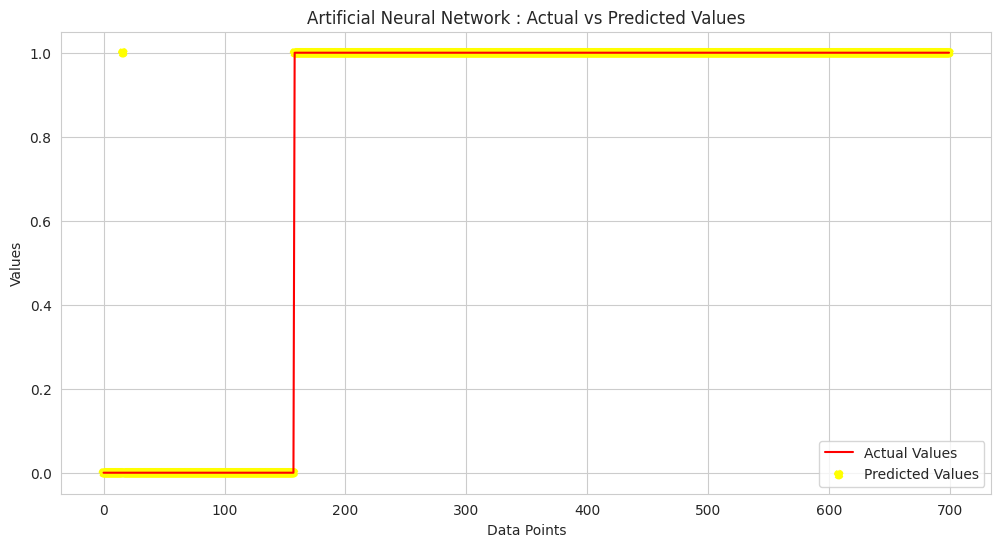

In [ ]:
# Line plot of actual vs sorted predicted values
sorted_idx = y_test.argsort()  # Sorting indices of y_test
y_test_sorted = y_test.iloc[sorted_idx].values  # Sorting y_test values
y_pred_ann_sorted = y_pred_ann[sorted_idx]  # Sorting y_pred_linear values

# Plotting actual vs sorted predicted values
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_sorted)), y_test_sorted, label='Actual Values', color='red')
plt.scatter(range(len(y_pred_ann_sorted)), y_pred_ann_sorted, label='Predicted Values', color='yellow', linestyle='--')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Artificial Neural Network : Actual vs Predicted Values')
plt.legend()
plt.show()

# Evaluation Metrics For Different Models We used

In [ ]:
from sklearn.metrics import classification_report
#Calculating the classification and accuracy report to identify which model is the best and predict the correct output
# Calculate accuracy and classification report for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared: {r2_linear}")
print()

# Calculate accuracy and classification report for Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logis)
classification_report_logistic = classification_report(y_test, y_pred_logis)

print("Logistic Regression:")
print(f"Accuracy: {accuracy_logistic}")
print("Classification Report:")
print(classification_report_logistic)
print()

# Calculate accuracy and classification report for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

print("SVM:")
print(f"Accuracy: {accuracy_svm}")
print("Classification Report:")
print(classification_report_svm)
print()

# Calculate accuracy and classification report for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest:")
print(f"Accuracy: {accuracy_rf}")
print("Classification Report:")
print(classification_report_rf)
print()

# Calculate accuracy and classification report for Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_report_nb = classification_report(y_test, y_pred_nb)

print("Naive Bayes:")
print(f"Accuracy: {accuracy_nb}")
print("Classification Report:")
print(classification_report_nb)
print()

# Calculate accuracy and classification report for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)

print("KNN:")
print(f"Accuracy: {accuracy_knn}")
print("Classification Report:")
print(classification_report_knn)
print()

# Calculate accuracy and classification report for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_report_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree:")
print(f"Accuracy: {accuracy_dt}")
print("Classification Report:")
print(classification_report_dt)


# Calculate accuracy and classification report for ANN
accuracy_ann = accuracy_score(y_test, y_pred_ann)
classification_report_ann = classification_report(y_test, y_pred_ann)

print("ANN:")
print(f"Accuracy: {accuracy_ann}")
print("Classification Report:")
print(classification_report_ann)
print()


Linear Regression:
Mean Squared Error: 0.0014313037169374962
R-squared: 0.9918102337650126

Logistic Regression:
Accuracy: 0.9828571428571429
Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.94      0.96       158
        True       0.98      0.99      0.99       542

    accuracy                           0.98       700
   macro avg       0.98      0.97      0.98       700
weighted avg       0.98      0.98      0.98       700


SVM:
Accuracy: 0.9971428571428571
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.99      0.99       158
        True       1.00      1.00      1.00       542

    accuracy                           1.00       700
   macro avg       1.00      0.99      1.00       700
weighted avg       1.00      1.00      1.00       700


Random Forest:
Accuracy: 0.9971428571428571
Classification Report:
              precision    recall  f1-score   support



# Predicting Accident Severity with ALL Models

**Actual Label of this input data is "Severe"**

In [35]:
# Define a single input data point
input_data = {
    'Vehicle_make': 'Honda',
    'Vehicle_type': 'sedan',
    'Vehicle_year': 2014,
    'Engine_type': 'CNG',
    'Engine_displacement': 2959,
    'Transmission_type': 'manual',
    'Number_of_cylinders': 4,
    'Vehicle_weight': 1949,
    'Vehicle_length': 3947,
    'Vehicle_width': 1933,
    'Vehicle_height': 1719,
    'Safety_rating': 1,
    'Number_of_airbags': 5,
    'ABS_presence': 0,
    'ESC_presence': 1,
    'TCS_presence': 0,
    'TPMS_presence': 1,
    'Crash_location': 'urban',
    'Weather_conditions': 'clear',
    'Road_surface_conditions': 'dry',
    'Time_of_day': 'night',
    'Day_of_week': 'Saturday',
    'Driver_age': 80,
    'Driver_gender': 'Female',
    'Vehicle_age': 10,
    'Driver_experience': 62
}

# Creating a DataFrame with the single input data point
input_df = pd.DataFrame([input_data])

# Applying one-hot encoding to categorical variables
categorical_features = ['Vehicle_make', 'Vehicle_type', 'Engine_type', 'Transmission_type',
                        'Crash_location', 'Weather_conditions', 'Road_surface_conditions',
                        'Time_of_day', 'Day_of_week', 'Driver_gender']
input_encoded = pd.get_dummies(input_df, columns=categorical_features)

# Load your trained model and scaler
# Assuming you have X_train, y_train, and scaler loaded from your previous training

# Ensuring the same column order as in the training data
# Assuming X_train.columns holds the column names
input_encoded = input_encoded.reindex(columns=X_train.columns, fill_value=0)

# Scaling numerical variables using the same scaler used for training
input_scaled = scaler.transform(input_encoded)

In [37]:
# Linear Regression

linear_reg = LinearRegression()

# Train
linear_reg.fit(X_train, y_train)

# Predict the severity
linear_predicted_class_label = linear_reg.predict(input_scaled)

linear_predicted_class_label = 'severe' if linear_predicted_class_label[0] else 'moderate'
print("Predicted Class:", linear_predicted_class_label)
print()
print()

Predicted Class: severe




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [38]:
# Logisitic Regression

logistic_reg = LogisticRegression()

# Train model
logistic_reg.fit(X_train, y_train)

# Predict the class (severe or moderate)
predicted_class = logistic_reg.predict(input_scaled)
predicted_class_label = 'severe' if predicted_class[0] else 'moderate'
print("Predicted Class:", predicted_class_label)
print()
print()

Predicted Class: severe




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [39]:
# SVM

svm_model = SVC()

# Train model
svm_model.fit(X_train, y_train)

# Predict the class
svm_predicted_class = svm_model.predict(input_scaled)

svm_predicted_class_label = 'severe' if svm_predicted_class[0] else 'moderate'

print("Predicted Class (SVM):", svm_predicted_class_label)
print()
print()

Predicted Class (SVM): severe




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [41]:
# Random Forest

rf_model = RandomForestClassifier()

# Train model
rf_model.fit(X_train, y_train)

# Predict the class
rf_predicted_class = rf_model.predict(input_scaled)

# Map the predicted class to its label
rf_predicted_class_label = 'severe' if rf_predicted_class[0] else 'moderate'

print("Predicted Class (Random Forest):", rf_predicted_class_label)

print()
print()

Predicted Class (Random Forest): severe




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [44]:
# Naive Bayes model

nb_model = GaussianNB()

# Train model
nb_model.fit(X_train, y_train)

# Predict the class
nb_predicted_class = nb_model.predict(input_scaled)

# Map the predicted class to its label
nb_predicted_class_label = 'severe' if nb_predicted_class[0] else 'moderate'

print("Predicted Class (Naive Bayes):", nb_predicted_class_label)

print()
print()

Predicted Class (Naive Bayes): severe




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [59]:
# KNN

knn_model = KNeighborsClassifier()

# Train model
knn_model.fit(X_train, y_train)

# Predict the class
knn_predicted_class = knn_model.predict(input_scaled)

# Map the predicted class to its label
knn_predicted_class_label = 'severe' if knn_predicted_class[0] else 'moderate'

print("Predicted Class (KNN):", knn_predicted_class_label)

print()
print("KNN Predicted wrong class because it's accuracy was low.")
print()
print()

Predicted Class (KNN): moderate

KNN Predicted wrong class because it's accuracy was low.




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [46]:
# Decision Tree model
dt_model = DecisionTreeClassifier()

# Train your model
dt_model.fit(X_train, y_train)

# Predict the class
dt_predicted_class = dt_model.predict(input_scaled)

# Map the predicted class to its label
dt_predicted_class_label = 'severe' if dt_predicted_class[0] else 'moderate'

print("Predicted Class (Decision Tree):", dt_predicted_class_label)
print()
print()

Predicted Class (Decision Tree): severe




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [56]:
# ANN
ann_model = ann_model = Sequential()

# Assuming your ANN model is already defined and compiled

# Compile the model
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Predict the class probabilities
ann_predicted_probabilities = ann_model.predict(input_scaled)

# Get the predicted class index
ann_predicted_class_index = tf.argmax(ann_predicted_probabilities, axis=1)

# Map the predicted class index to its label
ann_predicted_class_label = 'severe' if ann_predicted_class_index[0] == 0 else 'moderate'
print()
print("Predicted Class (ANN):", ann_predicted_class_label)

print()
print()

1/1 [==============================] - 0s 456ms/step

Predicted Class (ANN): severe




# ROC CURVE FOR EACH MODEL

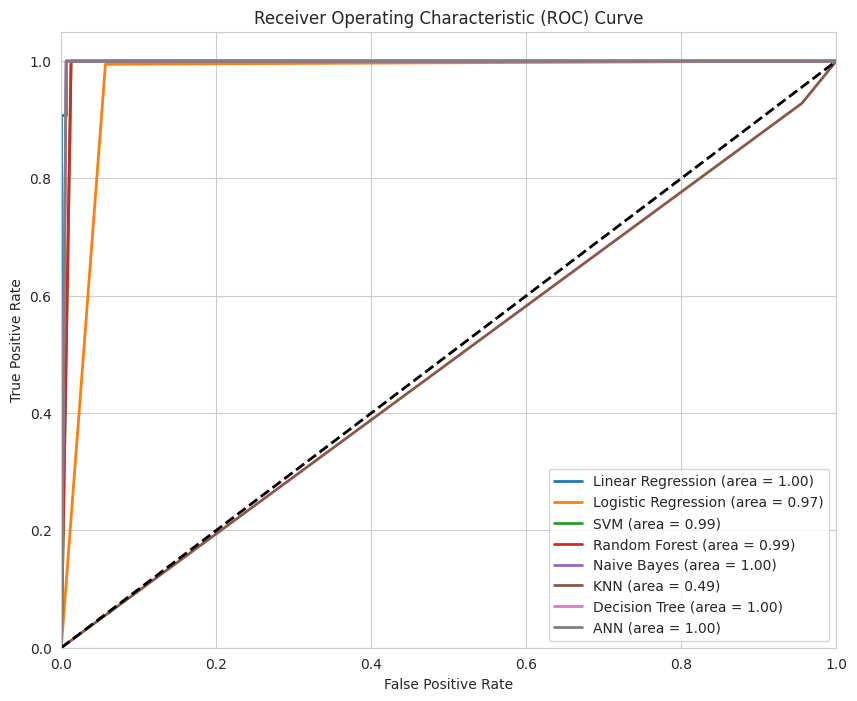

In [ ]:
#ROC curves provide a visual representation of the trade-off between
#the true positive rate (TPR) and false positive rate (FPR) at different classification thresholds.
#This allows you to assess the overall performance of the model and compare it to other models

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the models and their predictions
models = [
    ("Linear Regression", y_pred_linear),
    ("Logistic Regression", y_pred_logis),
    ("SVM", y_pred_svm),
    ("Random Forest", y_pred_rf),
    ("Naive Bayes", y_pred_nb),
    ("KNN", y_pred_knn),
    ("Decision Tree", y_pred_dt),
    ("ANN", y_pred_ann)
]

# Plot ROC curve for each model
plt.figure(figsize=(10, 8))
for model_name, y_pred in models:
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='%s (area = %0.2f)' % (model_name, roc_auc))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')

# Set plot parameters
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
